In [1]:
import numpy as np
import pandas as pd
import healpy as hp
import os
from DS_Planck_Unet import *
from DS_healpix_fragmentation import radec2pix
from matplotlib import pyplot as plt
from DS_data_transformation import draw_df

In [ ]:
pd.read_csv('/home/rt2122/Data/scans_coords')

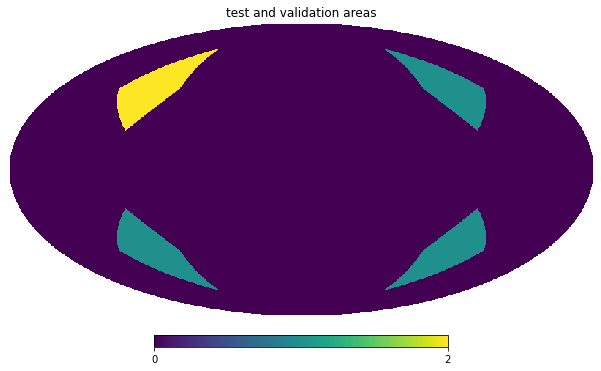

In [23]:
a = np.zeros(hp.nside2npix(2))
a[val_pix] = 1
a[test_pix] = 2
hp.mollview(a, nest=True, title='test and validation areas')

In [44]:
fp = []
for i in range(48):
    fp.append(pd.read_csv('/home/rt2122/Data/scans_coords_thr0.9_ep14/fp' + str(i) + 
                          '.csv'))
fp = pd.concat(fp)

In [45]:
fp.index = np.arange(fp.shape[0])

In [46]:
fp.to_csv('/home/rt2122/Data/scans_coords_combined/fp_thr0.9_ep14.csv', index=False)

In [47]:
planck_z = []
for i in range(48):
    file = '/home/rt2122/Data/scans_coords_thr0.9_ep14/planck_z' + str(i) + '.csv'
    if os.path.isfile(file):
        planck_z.append(pd.read_csv(file))
planck_z = pd.concat(planck_z)

In [48]:
planck_z.index = np.arange(planck_z.shape[0])

In [49]:
planck_z.head()

,Name,RA,DEC,z,MSZ,MCXC,RedMAPPer,found
0,PSZ2 G022.98+19.49,261.068715,0.415468,0.4044,6.790033,,,True
1,PSZ2 G036.73+14.93,271.129365,10.055297,0.1525,5.288359,J1804.4+1002,,True
2,PSZ2 G038.68+24.50,262.972551,15.677847,0.0836,2.475157,,,True
3,PSZ2 G041.45+29.10,259.466480,19.692548,0.1780,5.587061,J1717.8+1940,,True
4,PSZ2 G041.69+21.68,266.804962,17.130922,0.4790,5.828984,,,True


In [50]:
np.count_nonzero(planck_z['found']) / planck_z.shape[0]

0.8793418647166362

In [51]:
planck_z.to_csv('/home/rt2122/Data/scans_coords_combined/planck_z_thr0.9_ep14.csv', 
                index=False)

In [52]:
planck_no_z = []
for i in range(48):
    file = '/home/rt2122/Data/scans_coords_thr0.9_ep14/planck_no_z' + str(i) + '.csv'
    if os.path.isfile(file):
        planck_no_z.append(pd.read_csv(file))
planck_no_z = pd.concat(planck_no_z)

In [53]:
np.count_nonzero(planck_no_z['found']) / planck_no_z.shape[0]

0.5366726296958855

In [54]:
planck_no_z.to_csv('/home/rt2122/Data/scans_coords_combined/planck_no_z_thr0.9_ep14.csv', 
                   index=False)

In [55]:
mcxcwp = []
for i in range(48):
    file = '/home/rt2122/Data/scans_coords_thr0.9_ep14/mcxcwp' + str(i) + '.csv'
    if os.path.isfile(file):
        mcxcwp.append(pd.read_csv(file))
mcxcwp = pd.concat(mcxcwp)
np.count_nonzero(mcxcwp['found']) / mcxcwp.shape[0]

0.07627829002514669

In [56]:
mcxcwp.to_csv('/home/rt2122/Data/scans_coords_combined/mcxcwp_thr0.9_ep14.csv', 
              index=False)

In [57]:
act = []
for i in range(48):
    file = '/home/rt2122/Data/scans_coords_thr0.9_ep14/act' + str(i) + '.csv'
    if os.path.isfile(file):
        act.append(pd.read_csv(file))
act = pd.concat(act)
np.count_nonzero(act['found']) / act.shape[0]

0.038978494623655914

In [58]:
act.to_csv('/home/rt2122/Data/scans_coords_combined/act_thr0.9_ep14.csv', index=False)

In [47]:
thr_list = [0.1 * i for i in range(9, 0, -1)]

In [75]:
def draw_recall_and_fp(pix, thr_list = [0.1 * i for i in range(9, 0, -1)], 
                       figsize=(18, 6), comm_coords=(0.1, 0.6), 
                      comment=''):
    import os
    
    stats = {}
    for cat in ['planck_z', 'planck_no_z', 'mcxcwp', 'act']:
        file = '/home/rt2122/Data/scans/'+ cat + str(pix) + '.csv'
        if os.path.isfile(file):
            stats[cat] = pd.read_csv(file)
    
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    colors = 'bgrcmykw'
    ax[0].invert_xaxis()
    ax[1].invert_xaxis()
    
    for c, cat in zip(colors[:len(stats)], stats):
        line, = ax[0].plot(thr_list, stats[cat]['tp']/(stats[cat]['tp'] + 
                                                       stats[cat]['fn']), 
                           c+'o-')
        line.set_label('recall ' + cat)
        
    ax[0].legend()
    ax[0].set_xticks(thr_list)
    ax[0].set_yticks(np.arange(0, 1.1, 0.1))
    
    plt.yscale('log')
    line, = ax[1].plot(thr_list, stats['planck_z']['fp'], 'ko-')
    line.set_label('fp')
    for c, cat in zip(colors[:len(stats)], stats):
        line, = ax[1].plot(thr_list, stats[cat]['tp'], 
                           c+'o-', alpha=0.5)
        line.set_label('tp ' + cat)
    ax[1].legend()
    ax[1].set_xticks(thr_list)
    #ax[1].set_yticks(np.arange(0, max(stats['planck_z']['fp']) + 100, 100))
            
    ax[0].grid(b=True, which='major', color='#666666', linestyle=':')
    ax[1].grid(b=True, which='major', color='#666666', linestyle=':')
    
    plt.text(*comm_coords, comment)
    plt.show()


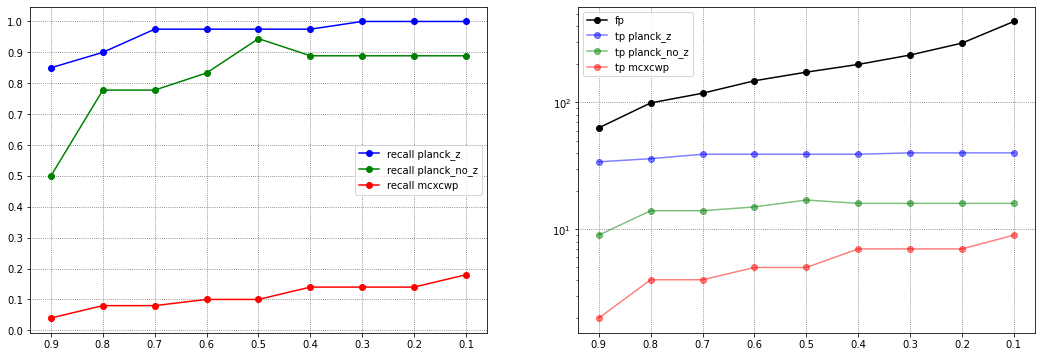

In [76]:
draw_recall_and_fp(6) #test

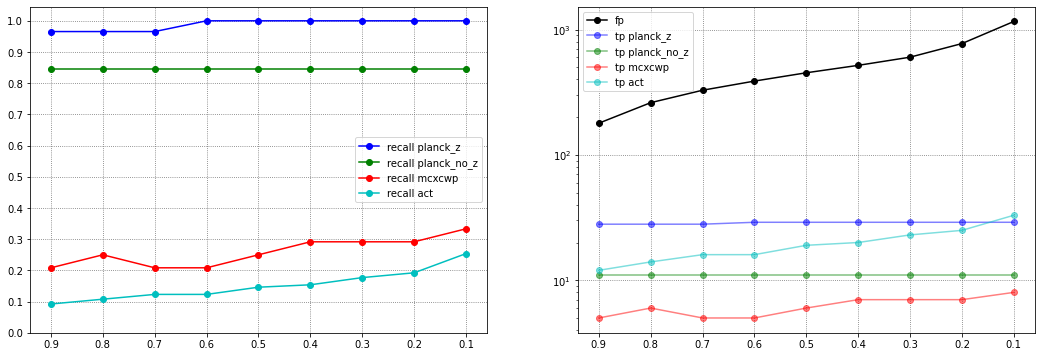

In [77]:
draw_recall_and_fp(val_pix[0])

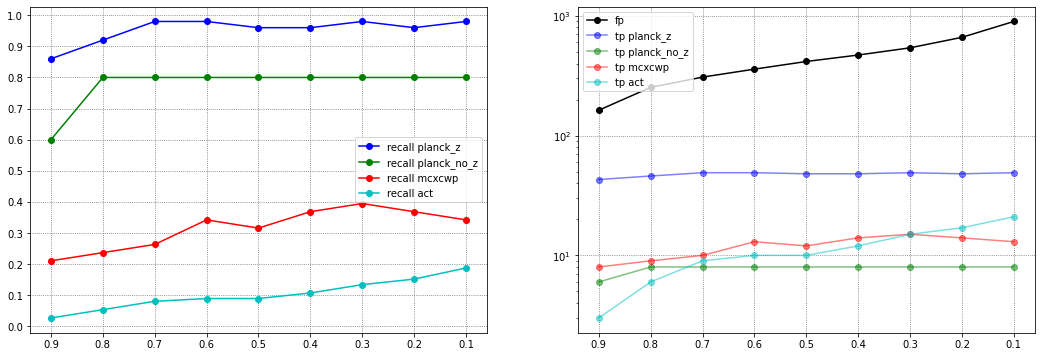

In [78]:
draw_recall_and_fp(val_pix[1])

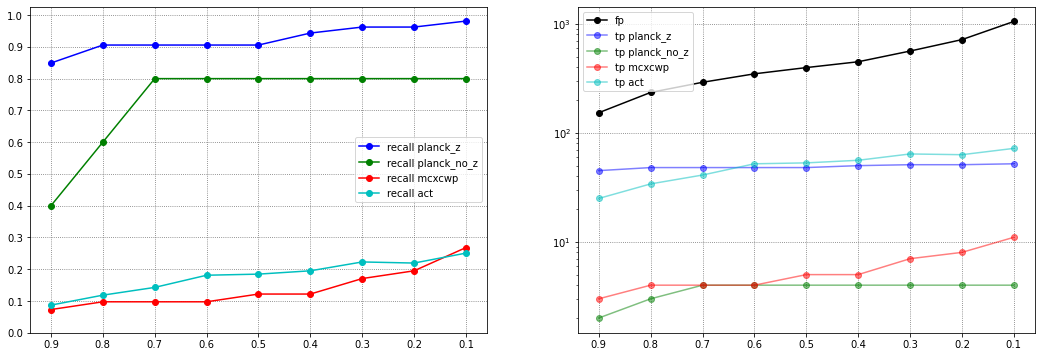

In [79]:
draw_recall_and_fp(val_pix[2])

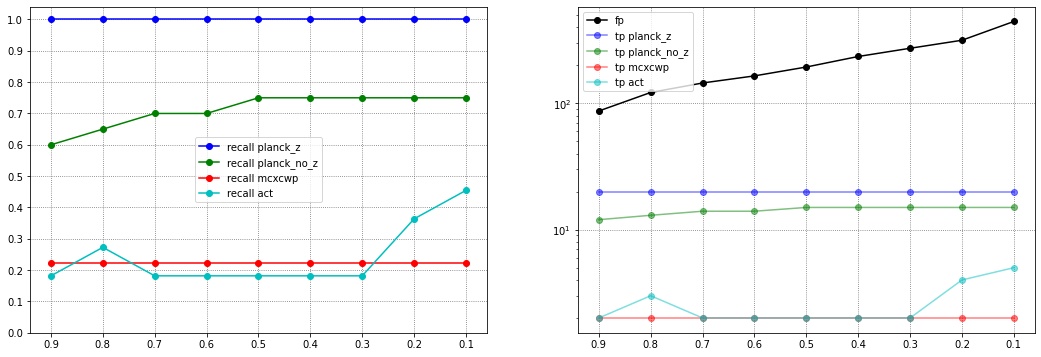

In [80]:
draw_recall_and_fp(0) #train

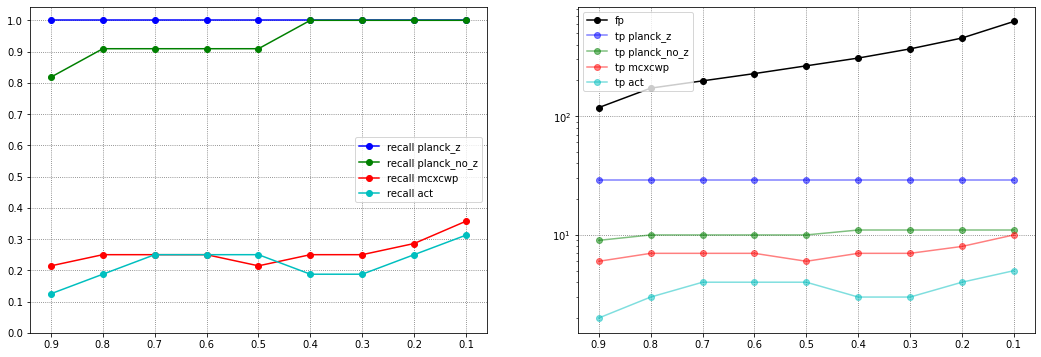

In [81]:
draw_recall_and_fp(14)

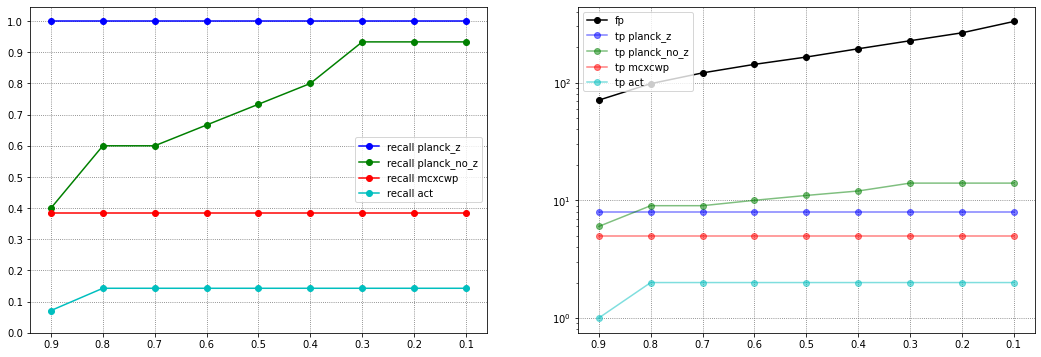

In [82]:
draw_recall_and_fp(24)

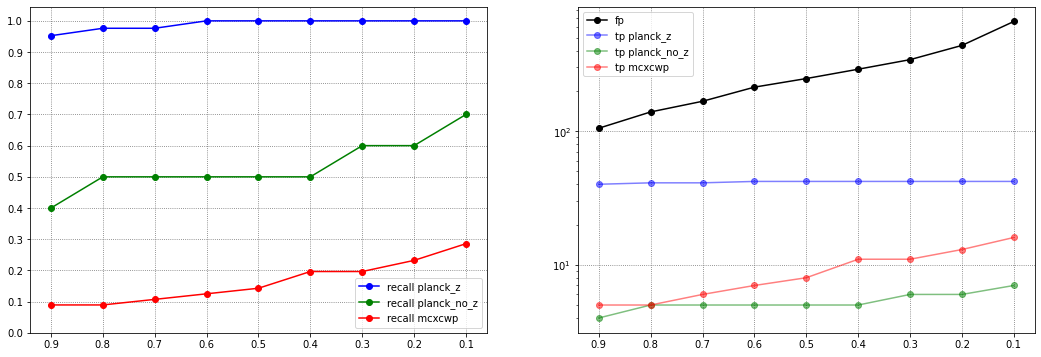

In [83]:
draw_recall_and_fp(7)